In [1]:
 pip install -U matplotlib

Requirement already up-to-date: matplotlib in c:\programdata\anaconda3\envs\scrapro\lib\site-packages (3.2.2)Note: you may need to restart the kernel to use updated packages.



In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [3]:
# re-size all the images to this
input_shape = [224, 224,3]
img_width = 224
img_height = 224

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')
folders

['Datasets/train\\Shirt', 'Datasets/train\\Tshirt']

In [5]:
# Used to rescale the pixel valie from [0,255] to [0,1] interval
datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
# automatically retrive images and there classes fro train and validation sets
train_genrator=datagen.flow_from_directory(train_path,
                                         target_size=(img_width,img_height),
                                         batch_size = 32,
                                         class_mode = 'binary')
test_genrato =datagen.flow_from_directory(valid_path,
                                         target_size=(img_height,img_height),
                                         batch_size=32,
                                         class_mode= 'binary')

Found 93 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [7]:
#first convolution extracts 32 filters that are 3x3
#Convolution is followed by max-pooling layer with a 2x2 windows
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


#Second convolution extracts 32 filters that are 3x3
#Convolution is followed by max-pooling layer with a 2x2 windows
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

#Third Convolution extract 128 filters that are 3x3
#Convolution is followed by max-pooling layers with 2x2 windows
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

#Flatten layers amp to a 1-dim tensor so we can add fully connected layers
model.add(Flatten())

#Creat a fully connected layers with Relu activation and 128 hidden layers
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

#create a output layers with two nodes and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# view the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       7

## Plotting  Our Model

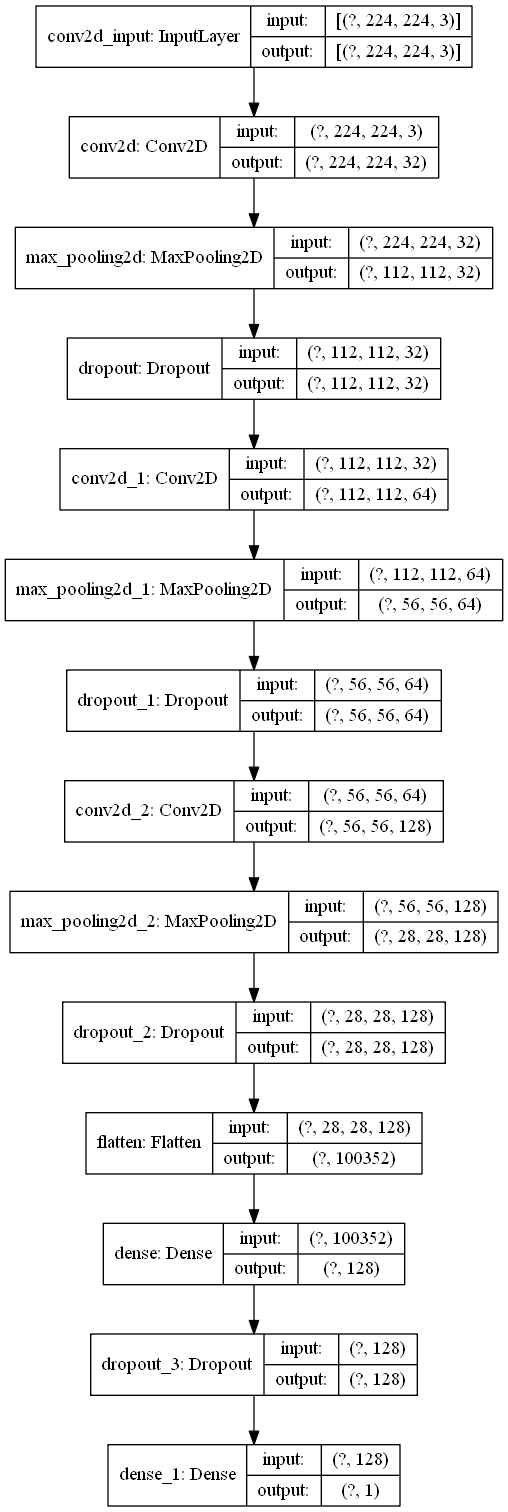

In [39]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
# tell the model what cost and optimization method to use
model.compile(
   loss='binary_crossentropy',
   optimizer='adam',
   metrics= ['accuracy']
)

In [9]:
# Use the Image Data Generator to import the image from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,             # normalize the pixel value to [0,1]
                                   shear_range = 0.2,            # randomlly apply a shearing transormation
                                   zoom_range = 0.2,             # randomlly apply a shearing transormation
                                   rotation_range = 30,
                                   horizontal_flip = True)       # randomlly filp the image

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 93 images belonging to 2 classes.


In [11]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 27 images belonging to 2 classes.


In [12]:
pip install pillow

## Training our Model

In [13]:
# fit the model
# Run the cell. It will take some time to execute
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
3/3 [==============================] - 14s 5s/step - loss: 37.6851 - accuracy: 0.5699 - val_loss: 11.2468 - val_accuracy: 0.5185
Epoch 2/50
3/3 [==============================] - 12s 4s/step - loss: 11.3714 - accuracy: 0.6344 - val_loss: 0.7738 - val_accuracy: 0.5185
Epoch 3/50
3/3 [==============================] - 10s 3s/step - loss: 3.7707 - accuracy: 0.6452 - val_loss: 1.1275 - val_accuracy: 0.5185
Epoch 4/50
3/3 [==============================] - 8s 3s/step - loss: 1.2035 - accuracy: 0.6022 - val_loss: 0.7017 - val_accuracy: 0.4815
Epoch 5/50
3/3 [==============================] - 8s 3s/step - loss: 0.6683 - accuracy: 0.6237 - val_loss: 0.6890 - val_accuracy: 0.6296
Epoch 6/50
3/3 [==============================] - 9s 3s/step - loss: 0.6632 - accuracy: 0.5806 - val_loss: 0.6886 - val_accuracy: 0.7037
Epoch 7/50
3/3 [==============================] - 8s 3s/step - loss: 0.6632 - accuracy: 0.7419 -

## Ploting our Loss and Accuracy Charts

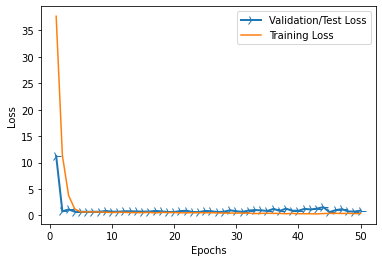

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

#Plot the loss
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs= range(1, len(loss_values) + 1)


line1 = plt.plot(epochs,val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs,loss_values, label = "Training Loss")
plt.setp(line1,linewidth = 2.0, marker = "+", markersize=10.0)
plt.setp(line1,linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid=(True)
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

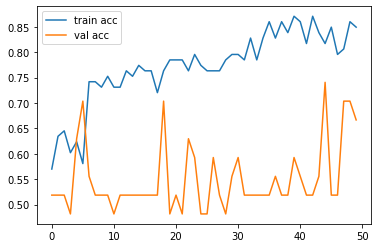

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
history.history

{'loss': [37.68510055541992,
  11.371448516845703,
  3.7707395553588867,
  1.203479528427124,
  0.6682959198951721,
  0.6631912589073181,
  0.6631995439529419,
  0.6465003490447998,
  0.5989763140678406,
  0.5450910925865173,
  0.5829532742500305,
  0.5731730461120605,
  0.5411093235015869,
  0.5260151028633118,
  0.5294195413589478,
  0.5708147883415222,
  0.4685269892215729,
  0.5710787177085876,
  0.5340785980224609,
  0.5492044687271118,
  0.4974765479564667,
  0.501430332660675,
  0.5057464241981506,
  0.5142554640769958,
  0.5028862357139587,
  0.5024456977844238,
  0.47667980194091797,
  0.457332581281662,
  0.43253129720687866,
  0.442356139421463,
  0.43885740637779236,
  0.4376218914985657,
  0.35185644030570984,
  0.3875771760940552,
  0.40729403495788574,
  0.38758498430252075,
  0.37638819217681885,
  0.32169419527053833,
  0.38235941529273987,
  0.3294009864330292,
  0.3268158435821533,
  0.31195852160453796,
  0.2855616807937622,
  0.3573321998119354,
  0.382926702499389

## Saving the Model

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_simple_cnn.h5')
print("Model Saved")

Model Saved


In [18]:
import os
import numpy as np

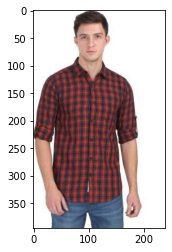

In [19]:
from tensorflow.keras.preprocessing import image

input_image_path = 'Datasets/test/Shirt/img_126.jpeg'


#show out input image for Feature Visualization
img1 = image.load_img(input_image_path)
plt.imshow(img1);


img_size = (224, 224)

# Load a image into a  4D Tensor,convert it to a numpy array and expand to 4 dim
img1 = image.load_img(input_image_path, target_size = img_size)
image_tensor = image.img_to_array(img1)
#print("image_tensor.shape")
image_tensor = image_tensor/255
image_tensor = np.expand_dims (image_tensor, axis=0)
#print(img.shape)

## Create a model form an input tensor and list of output tensors
To extract feature maps we create a keras model that take a batches of image as input and outputs the activation of all convolution and pooling layers

In [20]:
from keras import models

# Extract the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:9]]

#Creates a modelthat returns these output given the model input
activation_model = models.Model(inputs=model.input,  outputs=layer_outputs)

## Run our image through our models prediction fuction

In [21]:
activations =activation_model.predict(image_tensor)

In [22]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 224, 224, 32)


## Let's take a look at the first channel

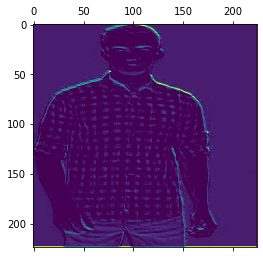

In [23]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :,1], cmap='viridis')

## let's Plot all 32

C:\ProgramData\Anaconda3\envs\scrapro\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


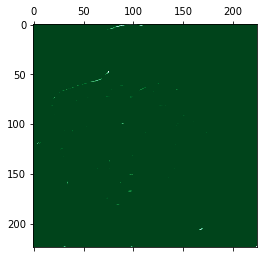

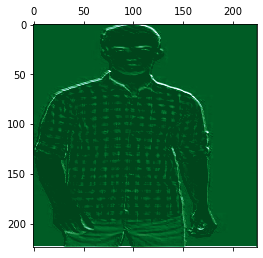

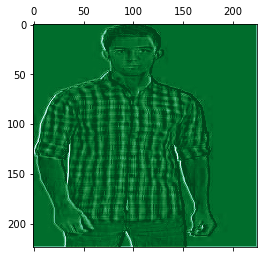

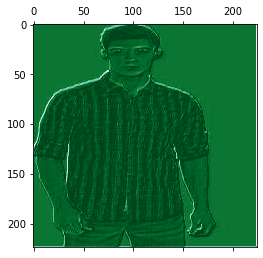

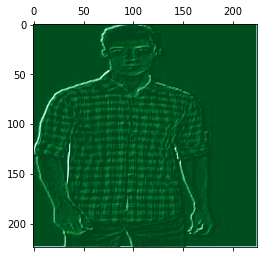

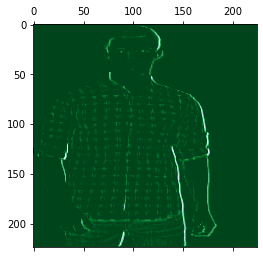

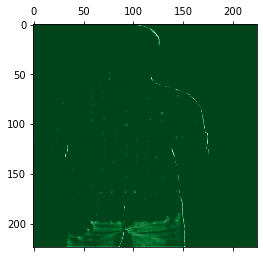

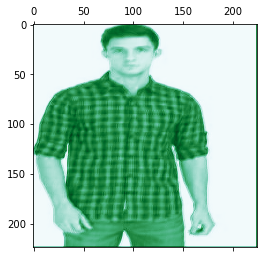

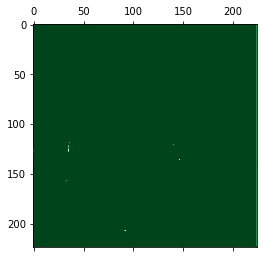

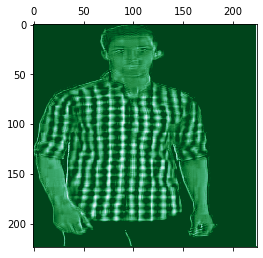

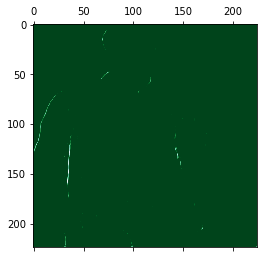

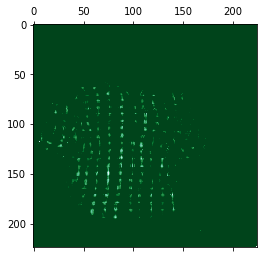

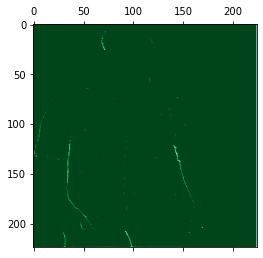

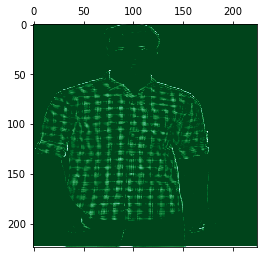

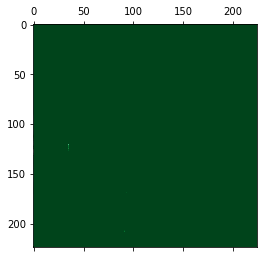

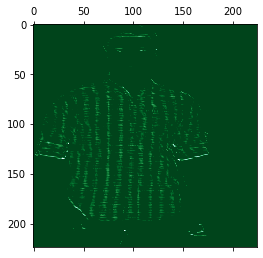

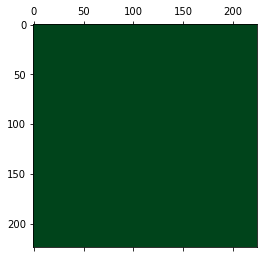

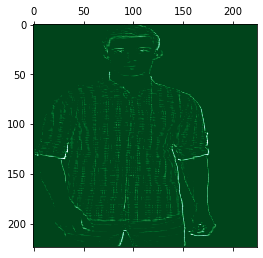

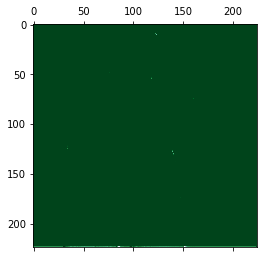

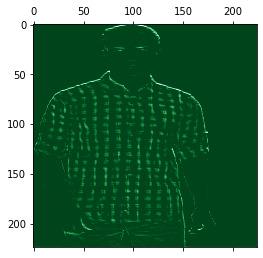

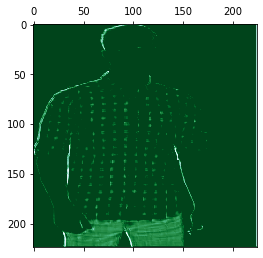

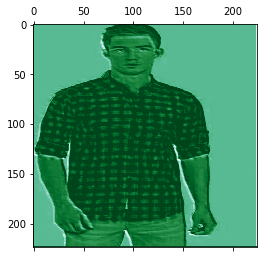

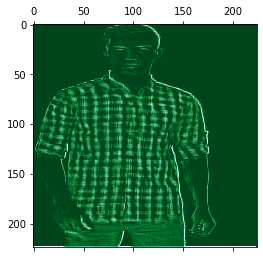

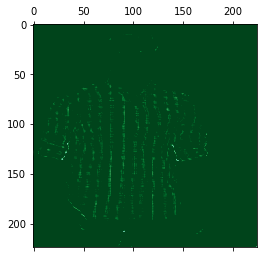

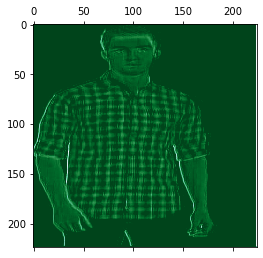

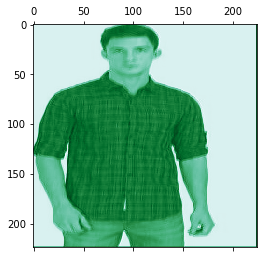

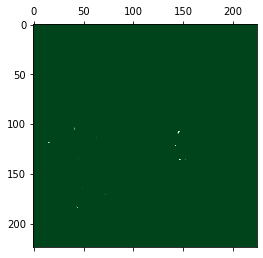

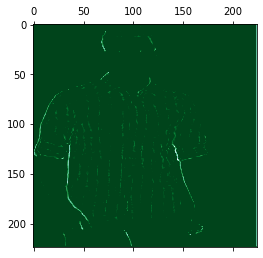

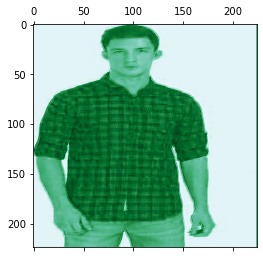

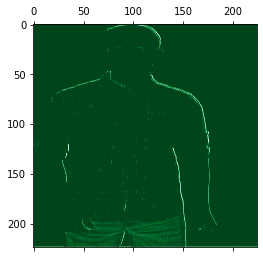

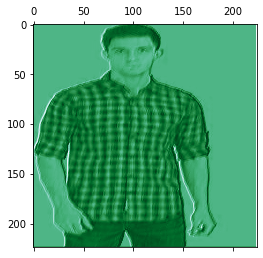

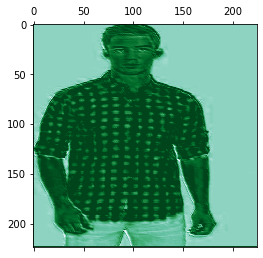

In [24]:
for i in range(0,32):
    plt.matshow(first_layer_activation[0,:, :,i], cmap='BuGn_r')